<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

A Loggi é uma empresa de tecnologia focada em logística. Um dos seus maiores desafios são as entregas *last-mile*. Esse tipo de entrega se caracteriza por ser a etapa final da logística que seria a entrega do produto ao consumidor final.

O Brasil é um país de dimensões continentais e naturalmente é uma região repleto de desafios para as empresas de logística. Portanto, é vital para as empresas deste setor encontrar boas soluções que realmetne otimizam as entregas, o funcionamento logístico e que reduza os custos operacionais.





## 2\. Pacotes e bibliotecas

In [ ]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#

...

In [ ]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy
import geopandas

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

!pip3 install geopandas;



## 3\. Exploração de dados

In [ ]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.



*   **Vou importar o arquivo com dados que contem conjuntos de entregas que devem ser realizadas no estado do Distrito Federal. Antes de chegar ao consumidor final, as mercadorias passam por um hub regional.**



In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [ ]:
# Atribuindo o arquivo a uma variavel

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [ ]:
# Verificando o que temos dentro do arquivo
var = data[0]
print(var)

# Temos chaves neste arquivo json
print(var.keys())

{'name': 'cvrp-2-df-33', 'region': 'df-2', 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274}, 'vehicle_capacity': 180, 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294}, 'size': 9}, {'id': '320c94b17aa685c939b3f3244c3099de', 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631}, 'size': 2}, {'id': '3663b42f4b8decb33059febaba46d5c8', 'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764}, 'size': 1}, {'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456}, 'size': 2}, {'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708}, 'size': 7}, {'id': '71271df40c3188cda88266f9969a5a9', 'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514}, 'size': 10}, {'id': 'be0cd4bee278b16f3473c8fb05e96464', 'point': {'lng': -48.121801874785255, 'lat': -15.852089389271015}, 'size': 7}, {'id': 'e



*  **Vou criar um DataFrame para melhor visualizar os dados**



In [ ]:
entregas_df = pd.DataFrame(data)

entregas_df.head(10)

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
5,cvrp-2-df-19,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p..."
6,cvrp-0-df-7,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p..."
7,cvrp-2-df-26,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p..."
8,cvrp-1-df-5,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p..."
9,cvrp-0-df-74,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po..."


Batendo o olho rapidamente é possível notar que a maior parte do trabalho estão nas colunas `origin` e `deliveries`, das quais contem informações agrupadas. Será preciso desmembrar o conteudo delas para podermos ter um entendimento melhor do caso.

### **Origin**

Para corrigir os dados aninhados, vamos utilizar de um processo chamado de normalização. Com a normalização, transformamos cada chave do arquivo json em uma nova coluna.

Importante ressaltar que o `json_normalize` não preserva o índice.

In [ ]:
# Foi criado duas novas colunas com os dados de origin

hub_origin_df = pd.json_normalize(entregas_df['origin'])
hub_origin_df.head(10)

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
5,-48.054989,-15.838145
6,-47.802665,-15.657014
7,-48.054989,-15.838145
8,-47.893662,-15.805118
9,-47.802665,-15.657014


In [ ]:
# Agora vamos junta-las ao DataFrame principal

entregas_df = pd.merge(left=entregas_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
entregas_df.head(10)

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145
5,cvrp-2-df-19,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p...",-48.054989,-15.838145
6,cvrp-0-df-7,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p...",-47.802665,-15.657014
7,cvrp-2-df-26,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p...",-48.054989,-15.838145
8,cvrp-1-df-5,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p...",-47.893662,-15.805118
9,cvrp-0-df-74,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po...",-47.802665,-15.657014


In [ ]:
# Vamos eliminar a coluna origin e reorganizar as colunas

entregas_df = entregas_df.drop('origin', axis=1)
entregas_df = entregas_df[['name', 'region', 'lng', 'lat', 'vehicle_capacity', 'deliveries']]
entregas_df.head(10)

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
5,cvrp-2-df-19,df-2,-48.054989,-15.838145,180,"[{'id': 'f4b64306e4c8185fe4baf332fdfdd22e', 'p..."
6,cvrp-0-df-7,df-0,-47.802665,-15.657014,180,"[{'id': '6cc90b13f3c4386580f4ca6c6799b2ed', 'p..."
7,cvrp-2-df-26,df-2,-48.054989,-15.838145,180,"[{'id': '5d8f8d40588819594b3e28cf2993c466', 'p..."
8,cvrp-1-df-5,df-1,-47.893662,-15.805118,180,"[{'id': '66ccd3ae2e54b3446f5a230996394f1d', 'p..."
9,cvrp-0-df-74,df-0,-47.802665,-15.657014,180,"[{'id': '44a85635558f376bb4987e18b9c8dc7', 'po..."


### **Deliveries**

Nota-se que a coluna `deliveries` está mais bagunçada do que a `origin` estava. Ela contem dados de uma lista de dados. Vamos normalizar com uma operação chamada de `explode`.

In [ ]:
# Crio um novo DataFrame com as novas colunas geradas pelo explode

entregas_exploded_df = entregas_df[['deliveries']].explode('deliveries')
entregas_exploded_df.head(10)

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."
0,"{'id': '71271df40c3188cda88266f9969a5a9', 'poi..."
0,"{'id': 'be0cd4bee278b16f3473c8fb05e96464', 'po..."
0,"{'id': 'e0fffb7150a2a202adb36e3f2fd5cc96', 'po..."
0,"{'id': '489efb8015b9b9e208d33abae808df23', 'po..."
0,"{'id': 'f4245aa5a08f39b615cfd57a117325ec', 'po..."


Conseguimos observar que cada série do DataFrame possui 4 informações, mas apenas 3 me será util nesta análise: point lng, point, lat e size.

Precisamos extrair as 3 em um novo DataFrame e depois junta-las ao DataFrame principal.

In [ ]:
# Neste código criei novos DataFrame para as novas colunas
# Renomei as novas colunas
# Juntei os novos Dataframe em um novo

entregas_normalizada_df = pd.concat([
    pd.DataFrame(entregas_exploded_df['deliveries'].apply(lambda x: x['size'])).rename(columns={'deliveries': 'entregas_tamanho'}),
    pd.DataFrame(entregas_exploded_df['deliveries'].apply (lambda x: x['point']['lat'])).rename(columns={'deliveries': 'entrega_lat'}),
    pd.DataFrame(entregas_exploded_df['deliveries'].apply (lambda x: x['point']['lng'])).rename(columns={'deliveries': 'entrega_lng'}),
], axis=1)

entregas_normalizada_df.head(10)

,entregas_tamanho,entrega_lat,entrega_lng
0,9,-15.848929,-48.116189
0,2,-15.850772,-48.118195
0,1,-15.847871,-48.112483
0,2,-15.846471,-48.118023
0,7,-15.858055,-48.114898
0,10,-15.847780,-48.120448
0,7,-15.852089,-48.121802
0,10,-15.851215,-48.116300
0,9,-15.849660,-48.116317
0,8,-15.849925,-48.123115


Vamos juntar o DataFrame gerado acima com o principal, mas antes vamos deletar a coluna `deliveries`

In [ ]:
entregas_df = entregas_df.drop('deliveries', axis=1)

In [ ]:
# Fiz a junção no modo right
entregas_df = pd.merge(left=entregas_df, right=entregas_normalizada_df, how='right', left_index=True, right_index=True)

# Resetei o índice para ficar igual
entregas_df.reset_index(inplace=True, drop=True)

entregas_df.head()

,name,region,lng,lat,vehicle_capacity,entregas_tamanho,entrega_lat,entrega_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.858055,-48.114898


Vou renomar os nomes das colunas para deixar tudo em português br

In [ ]:
entregas_df.rename(columns={'name': 'nome', 'region': 'regiao', 'lng': 'hub_lng', 'lat': 'hub_lat', 'vehicle_capacity': 'capacidade_veiculo'}, inplace=True)
entregas_df.head(10)

,nome,regiao,hub_lng,hub_lat,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.858055,-48.114898
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-15.847780,-48.120448
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.852089,-48.121802
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-15.851215,-48.116300
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.849660,-48.116317
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,8,-15.849925,-48.123115


Agora eu quero verificar alguns dados do DataFrame

In [ ]:
# 636149 linhas e 8 colunas

entregas_df.shape

(636149, 8)

In [ ]:
entregas_df.index

RangeIndex(start=0, stop=636149, step=1)

In [ ]:
# Sem valores nulos

entregas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nome                636149 non-null  object 
 1   regiao              636149 non-null  object 
 2   hub_lng             636149 non-null  float64
 3   hub_lat             636149 non-null  float64
 4   capacidade_veiculo  636149 non-null  int64  
 5   entregas_tamanho    636149 non-null  int64  
 6   entrega_lat         636149 non-null  float64
 7   entrega_lng         636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


In [ ]:
# Colunas e seus respectivos dados

entregas_df.dtypes

,0
nome,object
regiao,object
hub_lng,float64
hub_lat,float64
capacidade_veiculo,int64
entregas_tamanho,int64
entrega_lat,float64
entrega_lng,float64


In [ ]:
# Atributos categóricos

entregas_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
nome,636149,199,cvrp-1-df-87,5636
regiao,636149,3,df-1,304708


In [ ]:
# Atributos numéricos

# Nota-se que todos os veículos possuem a mesma capacidade

entregas_df.select_dtypes('int').describe().transpose()


,count,mean,std,min,25%,50%,75%,max
capacidade_veiculo,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
entregas_tamanho,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [ ]:
# Confirmando que até aqui não há valores nulos

entregas_df.isna().any()

,0
nome,False
regiao,False
hub_lng,False
hub_lat,False
capacidade_veiculo,False
entregas_tamanho,False
entrega_lat,False
entrega_lng,False


## 4\. Manipulação

In [ ]:
# faça o código de manipulação de dados:
#
# - enriquecimento;
# - controle de qualidade;
# - etc.

Agora vamos para o processo de Geocodificação Reversa, que seria transformar as coordenadas de latitude e longitude em endereços reais. Dessa forma conseguimos ter uma melhor idea das localizações das entregas.

In [ ]:
entregas_df.head()

,nome,regiao,hub_lng,hub_lat,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-15.858055,-48.114898


In [ ]:
# Vamos criar um DataFrame apenas com as colunas que eu quero manipular.
# Começamos a localização dos hubs
hub_df = entregas_df[['regiao', 'hub_lng', 'hub_lat']]

# Elimino as duplicatas, organizo os dados por região, reseto o indice
hub_df = hub_df.drop_duplicates().sort_values(by='regiao').reset_index(drop=True)

hub_df.head()

,regiao,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Temos a confirmação de que são apenas 3 hubs de entregas para o estado do Distrito Federal.

Seria 3 hubs muito? Pouco?

Vamos continuar a analise visualizando o que tem de informação em um ponto de coordenada.



*   **Geocodificação Hubs**



In [ ]:
geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.657014, -47.802665")
print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 14416233,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656915980217473",
  "lon": "-47.802644868369704",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.053411383993285995,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Vila DNOCS, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Vila DNOCS",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Feder

Agora conseguimos ter uma visualização do que a aqueles numeros de latitutde e longitude representa em termos práticos.

Vou criar um novo DataFrame extraindo apenas as colunas que eu quero.

In [ ]:
# Defino um nome para o aplicador de geocodificação
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)


# Estou criando um novo DataFrame com as coordernadas dos hubs
# Converto para string para o python não pensar que é para somar os valores e sim concatena-los
hub_df['coordenadas'] = hub_df['hub_lat'].astype(str) + ',' + hub_df['hub_lng'].astype(str)

# Aplico a geocodificação
hub_df['geodata'] = hub_df['coordenadas'].apply(geocoder)
hub_df.head()

,regiao,hub_lng,hub_lat,coordenadas,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248,-47.802664728268745","(Rua 7, Quadra 2, Vila DNOCS, Sobradinho, Regi..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334,-47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274,-48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Setor B S..."


Agora que temos as coordenadas em uma única coluna e as informações textuais em outra (geodata) precisamos extrair somente os dados que precisamos da coluna geodata.

A função `lambda data: data.raw` acessa a propriedade `raw` de cada objeto data da coluna. A propriedade `raw` é um dicionário contendo os dados brutos da resposta da geocodificação, com informações como o endereço, latitude, longitude, país, etc.

In [ ]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number,address.quarter
0,14416233,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053411,...,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN,NaN
1,14619249,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172753950067,-47.89372354453109,highway,residential,26,0.053411,...,BR-DF,Região Centro-Oeste,70336-000,Brasil,br,SQS 303,Brasília,NaN,NaN,NaN
2,11654896,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000051,...,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8,Setor B Sul


Agora tenho um DataFrame com as informações textuais dos endereços, podendo extrair o que eu achar util.

Eu vou extrair  as seguintes colunas deste DataFrame:


*   address.town
* address.suburb
* address.city
* class
* address.neighbourhood





In [ ]:
# Pego as colunas que eu quero
hub_geodata_df = hub_geodata_df[['class', 'address.suburb', 'address.town' , 'address.neighbourhood', 'address.city']]

# Renomeio elas
hub_geodata_df.rename(columns={
    'class': 'hub_tipo_localização',
    'address.suburb': 'hub_suburbio',
    'address.town': 'hub_town',
    'address.neighbourhood': 'hub_bairro',
    'address.city': 'hub_cidade'
    }, inplace=True)


# Se tiver valores nulo em hub_cidade preencho com valores de hub_town
hub_geodata_df['hub_cidade'] = np.where(hub_geodata_df['hub_cidade'].notna(), hub_geodata_df['hub_cidade'], hub_geodata_df['hub_town'])

# Mesma coisa, agora com hub_suburb
hub_geodata_df['hub_suburbio'] = np.where(hub_geodata_df['hub_suburbio'].notna(), hub_geodata_df['hub_suburbio'], hub_geodata_df['hub_bairro'])




<ipython-input-45-bf022d159745>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={
<ipython-input-45-bf022d159745>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_cidade'] = np.where(hub_geodata_df['hub_cidade'].notna(), hub_geodata_df['hub_cidade'], hub_geodata_df['hub_town'])
<ipython-input-45-bf022d159745>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
hub_geodata_df.head()

,hub_tipo_localização,hub_suburbio,hub_town,hub_bairro,hub_cidade
0,highway,Vila DNOCS,Sobradinho,NaN,Sobradinho
1,highway,Asa Sul,NaN,SQS 303,Brasília
2,shop,Taguatinga Centro,NaN,NaN,Taguatinga


In [ ]:
# Elimino as colunas para não ficar com dados duplicados
hub_geodata_df = hub_geodata_df.drop(columns=['hub_town'], axis=1)
hub_geodata_df= hub_geodata_df.drop(columns=['hub_bairro'], axis=1)

hub_geodata_df.head()

,hub_tipo_localização,hub_suburbio,hub_cidade
0,highway,Vila DNOCS,Sobradinho
1,highway,Asa Sul,Brasília
2,shop,Taguatinga Centro,Taguatinga


Agora vou juntar ao DataFrame principal

In [ ]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[['regiao', 'hub_tipo_localização', 'hub_suburbio', 'hub_cidade']]
hub_df.head()

,regiao,hub_tipo_localização,hub_suburbio,hub_cidade
0,df-0,highway,Vila DNOCS,Sobradinho
1,df-1,highway,Asa Sul,Brasília
2,df-2,shop,Taguatinga Centro,Taguatinga


In [ ]:
entregas_df = pd.merge(left=entregas_df, right=hub_df, how='inner', on='regiao')
entregas_df = entregas_df[['nome', 'regiao', 'hub_lng', 'hub_lat', 'hub_tipo_localização', 'hub_cidade', 'hub_suburbio', 'capacidade_veiculo', 'entregas_tamanho', 'entrega_lat', 'entrega_lng']]
entregas_df.head()

,nome,regiao,hub_lng,hub_lat,hub_tipo_localização,hub_cidade,hub_suburbio,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.848929,-48.116189
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.850772,-48.118195
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-15.847871,-48.112483
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.846471,-48.118023
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.858055,-48.114898


Geocodificação das coordernadas dos 3 hubs estão completas, agora vamos partir para a geocodificação das entregas.



*   **Geocodificação entregas**



Temos mais de 600 mil endereços para fazer a geocodificação. Devido a limitação do Nomatim de 1 execução por segundo, isso levaria aproximadamente 7 dias para finalizar, fora a possibilidade de tomar bloqeido de IP.

O professor fez esse trabalho e disponilizou pronto para a gente, portanto vou aproveitar aqui neste projeto.

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

Trouxe um arquivo .csv para dentro da maquina local. Agora vou atribuir a uma variavel.

In [ ]:
entregas_geodata_df = pd.read_csv('deliveries-geodata.csv')
entregas_geodata_df.head(1000)

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
...,...,...,...,...
995,-47.978562,-15.814165,Guará,Guará
996,-47.975871,-15.812263,Guará,Guará
997,-47.977684,-15.812800,Guará,Guará
998,-47.977011,-15.817024,Guará,Guará


Agora vou juntar esse DataFrame criado pelo .csv com o DataFrame principal

In [ ]:
entregas_df = pd.merge(left=entregas_df, right=entregas_geodata_df[['delivery_city', 'delivery_suburb']], how='inner', left_index=True, right_index=True)
entregas_df.head()

,nome,regiao,hub_lng,hub_lat,hub_tipo_localização,hub_cidade,hub_suburbio,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.848929,-48.116189,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.850772,-48.118195,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-15.847871,-48.112483,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.846471,-48.118023,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Vou renomear para ficar tudo em portugues

In [ ]:
hub_geodata_df.rename(columns={
    'class': 'hub_tipo_localização',
    'address.suburb': 'hub_suburbio',
    'address.town': 'hub_town',
    'address.neighbourhood': 'hub_bairro',
    'address.city': 'hub_cidade'
    }, inplace=True)

entregas_df.rename(columns={'delivery_city': 'entrega_cidade', 'delivery_suburb': 'entrega_suburbio'}, inplace=True)
entregas_df.head()

,nome,regiao,hub_lng,hub_lat,hub_tipo_localização,hub_cidade,hub_suburbio,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng,entrega_cidade,entrega_suburbio
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.848929,-48.116189,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.850772,-48.118195,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-15.847871,-48.112483,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.846471,-48.118023,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


Vamos verificar a qualidade dos dados

In [ ]:
entregas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   nome                  636149 non-null  object 
 1   regiao                636149 non-null  object 
 2   hub_lng               636149 non-null  float64
 3   hub_lat               636149 non-null  float64
 4   hub_tipo_localização  636149 non-null  object 
 5   hub_cidade            636149 non-null  object 
 6   hub_suburbio          636149 non-null  object 
 7   capacidade_veiculo    636149 non-null  int64  
 8   entregas_tamanho      636149 non-null  int64  
 9   entrega_lat           636149 non-null  float64
 10  entrega_lng           636149 non-null  float64
 11  entrega_cidade        634447 non-null  object 
 12  entrega_suburbio      476264 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 63.1+ MB


In [ ]:
entregas_df.isna().any()

,0
nome,False
regiao,False
hub_lng,False
hub_lat,False
hub_tipo_localização,False
hub_cidade,False
hub_suburbio,False
capacidade_veiculo,False
entregas_tamanho,False
entrega_lat,False


Perceba que as duas ultimas colunas adicionadas, que eram as coordenadas das entregas possuem valores nulos. Apesar de não ser o ideal, é compreensível que isso aconteça pois:



*  Estamos falando de um território enorme que é o Brasil. Existe uma dificuldade natural de se mapea-lo. Regioes mais remotas é comum que fiquem "mal-interpretadas".
* Estamos usando um serviço estrangeiro para fazer a geocodificação, o que amplia a dificuldade de interpretação de certas regiões.
* Podem estar relacionado a pouca cobertura da regiao  ou dados desatualizados por parte do serviço.
* Cidades menores podem ter menos informações.



In [ ]:
proporcao_df = entregas_df[['entrega_cidade']].value_counts() / len(entregas_df)
proporcao_df.sort_values(ascending=False).head(10)

,count
entrega_cidade,
Brasília,0.234195
Taguatinga,0.071625
Sudoeste / Octogonal,0.069504
Ceilândia,0.059661
Águas Claras,0.058293
Guará,0.055619
Lago Sul,0.045620
Sobradinho,0.045412
Lago Norte,0.040832


In [ ]:
proporcao_df = entregas_df[['entrega_suburbio']].value_counts() / len(entregas_df)
proporcao_df.sort_values(ascending=False).head(10)

,count
entrega_suburbio,
Brasília,0.084564
Asa Norte,0.076639
Taguatinga,0.063363
Asa Sul,0.059263
Águas Claras,0.056598
Guará,0.055619
Samambaia,0.026514
Sobradinho,0.018148
Recanto das Emas,0.015029


## 5\. Visualização

In [ ]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.

Agora vamos partir para a visualização de gráficos e mapas para tirarmos alguns insights

Vou importar os dados cartográficos do Distrito Federal disponibilizado pelo IBGE

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [ ]:
mapa = geopandas.read_file("distrito-federal.shp")

# Aqui seleciono apenas do Distrito Federal
mapa = mapa.loc[[0]]

mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0, -47.31057 -..."




*   **Preparação**



Agora vou criar os DataFrames com as informações que eu quero

Preciso preparar o dado para trabalhar com o GeoPandas. Deste modo, vou criar um novo DataFrame com a coluna `geometry` que conterá as informações de latitude e longitude no padrão do formato que o GeoPandas espera.

In [ ]:
hub_df = entregas_df[['regiao', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)

geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df['hub_lng'], hub_df['hub_lat']))
geo_hub_df.head()

,regiao,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)


In [ ]:
geo_entregas_df = geopandas.GeoDataFrame(entregas_df, geometry=geopandas.points_from_xy(entregas_df['entrega_lng'], entregas_df['entrega_lat']))
geo_entregas_df

,nome,regiao,hub_lng,hub_lat,hub_tipo_localização,hub_cidade,hub_suburbio,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng,entrega_cidade,entrega_suburbio,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.848929,-48.116189,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.850772,-48.118195,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-15.847871,-48.112483,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.846471,-48.118023,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.1149 -15.85805)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636144,cvrp-2-df-62,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,8,-15.997694,-48.064269,Gama,Setor Oeste,POINT (-48.06427 -15.99769)
636145,cvrp-2-df-62,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,4,-16.003597,-48.065176,Gama,Setor Oeste,POINT (-48.06518 -16.0036)
636146,cvrp-2-df-62,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-16.003808,-48.065841,Gama,Setor Oeste,POINT (-48.06584 -16.00381)
636147,cvrp-2-df-62,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-16.001568,-48.062327,Gama,Setor de Indústrias - Industrial,POINT (-48.06233 -16.00157)


* **Mapa dos hubs**

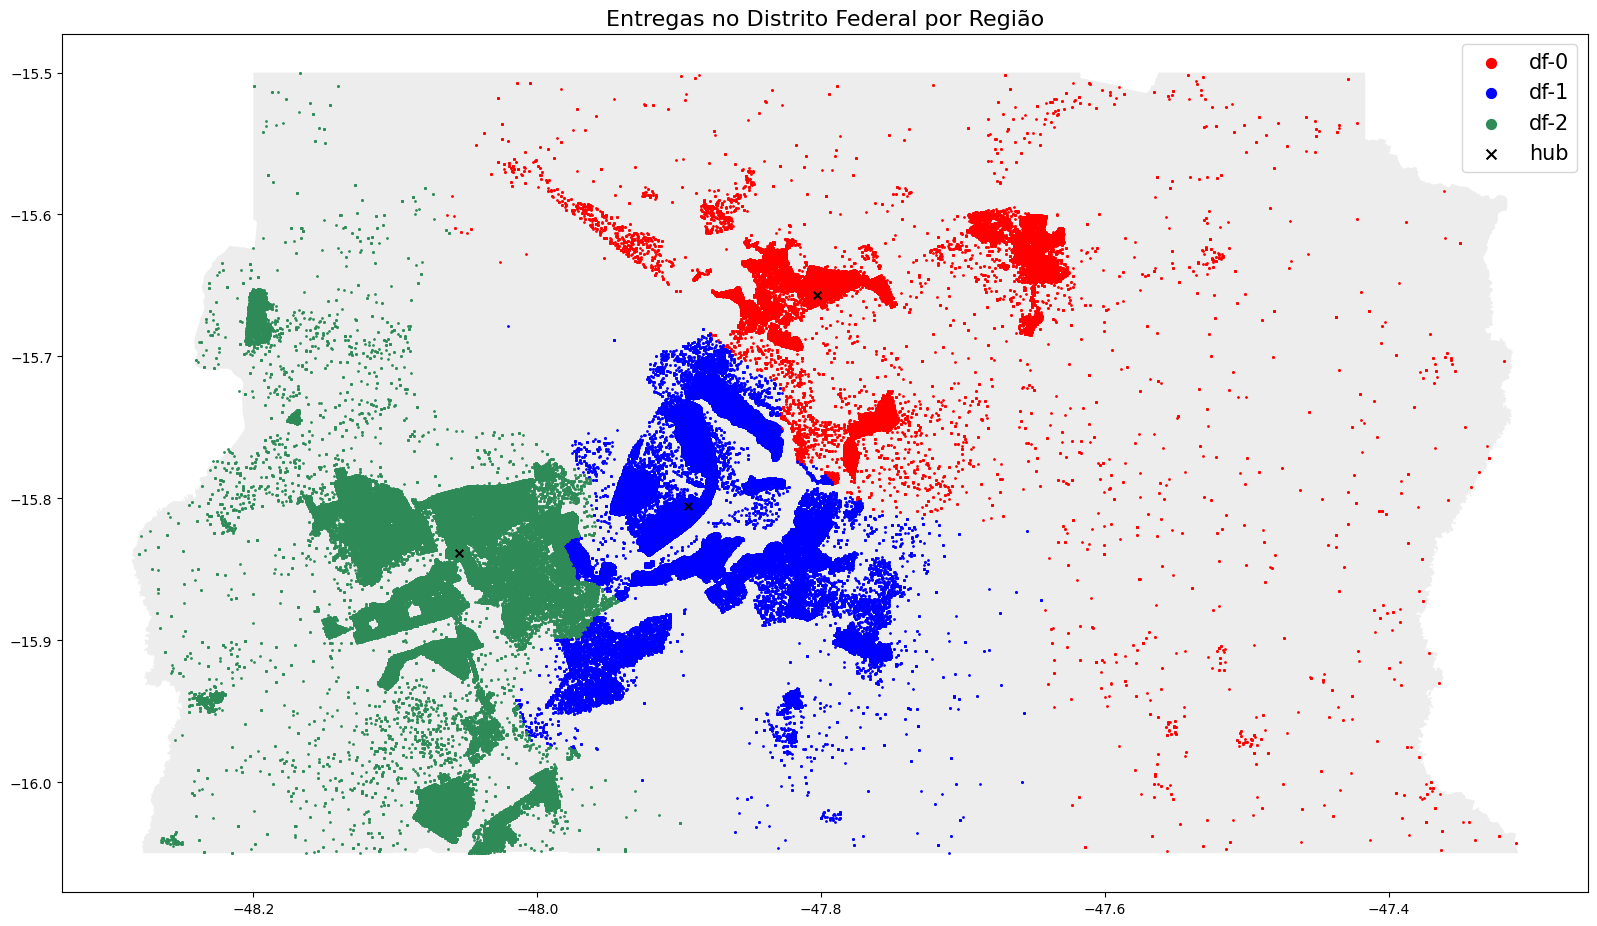

In [ ]:
# Crio a figura vazia
fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# Plotagem do mapa do estado do DF
mapa.plot(ax=ax, alpha=0.4, color='lightgrey')

# Plotagem das entregas
geo_entregas_df.query("regiao == 'df-0'").plot(ax=ax, markersize=1, color='red', label='df-0')
geo_entregas_df.query("regiao == 'df-1'").plot(ax=ax, markersize=1, color='blue', label='df-1')
geo_entregas_df.query("regiao == 'df-2'").plot(ax=ax, markersize=1, color='seagreen', label='df-2')

# Plotagem dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker='x', color='black', label='hub')

# Legendas
plt.title("Entregas no Distrito Federal por Região", fontdict={'fontsize': 16})
legenda = plt.legend(prop={'size': 15})

for handle in legenda.legend_handles:
  handle.set_sizes([50])


Chegamos a um mapa representando claramente as entregas no estado Distrito Federal. Podemos afirmar que:
* df-2 (verde) é a região sul
* df-1 (azul) é a região central
* df-0 (vermelho) é a região norte

Vamos confirmar a proporção das entregas por região

In [ ]:
dados = pd.DataFrame(entregas_df[['regiao', 'capacidade_veiculo']].value_counts(normalize=True)).reset_index()
#dados.rename(columns={0: 'regiao_porcentagem'}, inplace=True)
dados.head()

,regiao,capacidade_veiculo,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


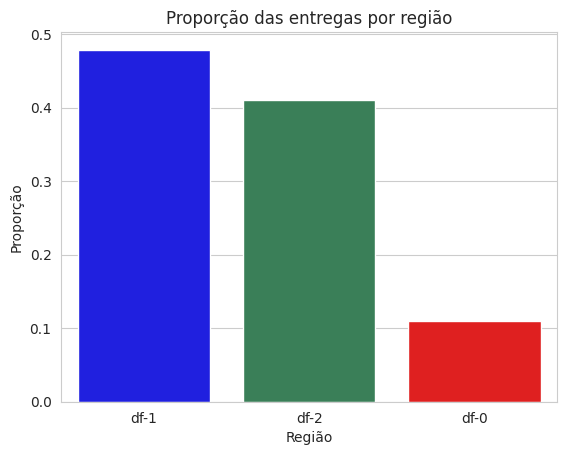

In [ ]:
cores = ['blue', 'seagreen', 'red']

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=dados, x='regiao', y='proportion', errorbar=None, hue='regiao', palette=cores)
  grafico.set(title='Proporção das entregas por região', xlabel='Região', ylabel='Proporção');



*   Insights



O norte (vermelho) representa a maior pedaço territorial e também é o que possui entregas mais distante e bem espalhadas.

Em questão de quantidades, a região central (azul) é a que mais possui demanda, seguida pela região sul (verde).  Nota-se que o volume de entregas da região norte é menos da metade da região sul.



A capacidade dos veiculos é a mesma para as 3 regiões, o que aparenta não ser necessário, visto que o volume de entregas da região norte é inferior aos demais, representando cerca de 10% do volume total de entregas.

É de muita valia verificar a troca de veiculo ou aquisição de um veiculo de menor capacidade para a regiao norte. Um veiculo mais economico ajudaria a reduzir o custo, visto que as entregas da regiao norte são mais distantes.

Hoje é possível encontrar veiculos eletricos com baixo consumo por km. É um investimento que se pagará ao longo do tempo.

In [ ]:
entregas_df.head(10)

,nome,regiao,hub_lng,hub_lat,hub_tipo_localização,hub_cidade,hub_suburbio,capacidade_veiculo,entregas_tamanho,entrega_lat,entrega_lng,entrega_cidade,entrega_suburbio
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.848929,-48.116189,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.850772,-48.118195,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,1,-15.847871,-48.112483,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,2,-15.846471,-48.118023,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.858055,-48.114898,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,10,-15.847780,-48.120448,Ceilândia,P Sul
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,7,-15.852089,-48.121802,Ceilândia,P Sul
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,10,-15.851215,-48.116300,Ceilândia,P Sul
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,9,-15.849660,-48.116317,Ceilândia,P Sul
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,shop,Taguatinga,Taguatinga Centro,180,8,-15.849925,-48.123115,Ceilândia,P Sul
